In [1]:
import json
from pathlib import Path

In [2]:
from math import cos, sin
def rot(v, theta):
    theta = np.deg2rad(theta)
    mat = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    return np.dot(mat, v)

In [3]:
import numpy as np

In [4]:
def unfurl(X, base_vector=np.array([0,1]), origin=np.array([0,0]), depth=None, cdepth=0):
    vs = []
    
    if 'children' not in X:
        return []
    
    if depth is not None:
        if cdepth >= depth:
            return []
    
    girls = [c for c in X['children'] if c['gender'] == 'woman']
    boys = [c for c in X['children'] if c['gender'] == 'man']
    
    #print(origin, base_vector)
    
    #print(len(girls), len(boys))
    
    for ci, c in enumerate(girls):
        #new_v = rot( base_vector, -CURL * (ci+1) )# / len(girls) )
        new_v = rot( base_vector, -CURL * (ci+1) / len(girls))
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v, c["gender_color"]) )
        vs += unfurl(c, new_v, origin+new_v, depth, cdepth+1)

    for ci, c in enumerate(boys):
        #new_v = rot( base_vector, CURL * (ci+1) )# / len(boys) )
        new_v = rot( base_vector, CURL * (ci+1) / len(boys))
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v, c["gender_color"]) )
        vs += unfurl(c, new_v, origin+new_v, depth, cdepth+1)
            
    return vs

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

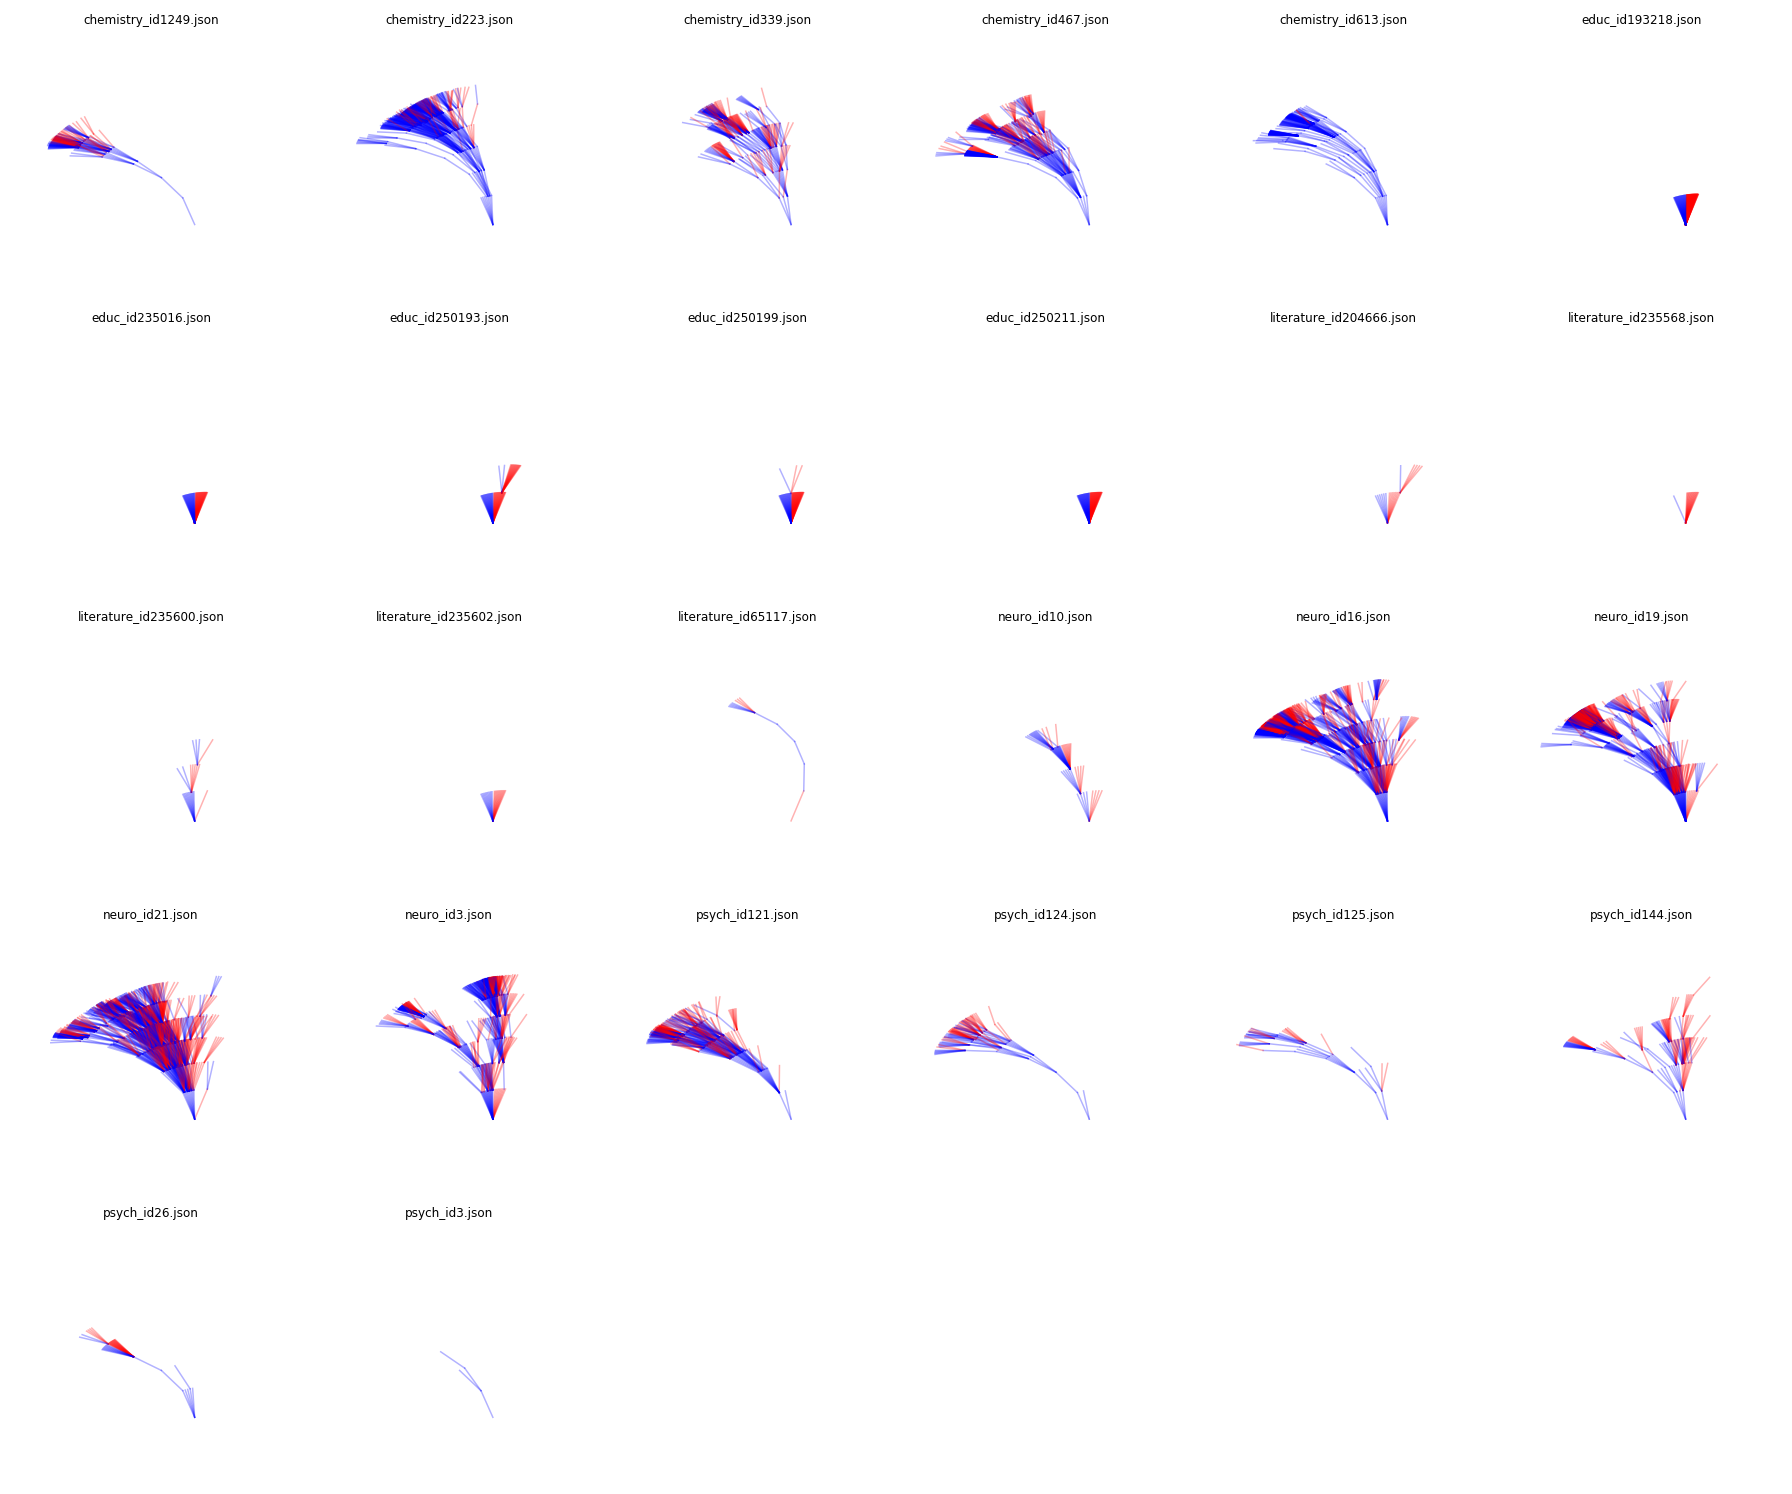

In [6]:
SCALE=0.9
CURL=15

fns = list(Path('data/').glob("*.json"))

plt.rcParams["figure.figsize"] = [25, 25]
plt.rcParams["figure.autolayout"] = True

for i, treefn in enumerate(fns):
    with open(treefn) as f:
        tree = json.loads(f.read())
        ax = plt.subplot(6,6,1+i,projection='3d')
        ax.set_xlim(left=-3.2, right=0.8)
        ax.set_ylim(-2,2)
        ax.set_zlim(bottom=0, top=4)
        for s, e, c in unfurl(tree, depth=None):
            ax.plot3D([s[0], e[0]], [s[0], e[0]], [s[1],e[1]], color=c, alpha=0.3)
        ax.set_axis_off()
        ax.set_title(treefn.name)

In [7]:
import warnings
warnings.filterwarnings("ignore")

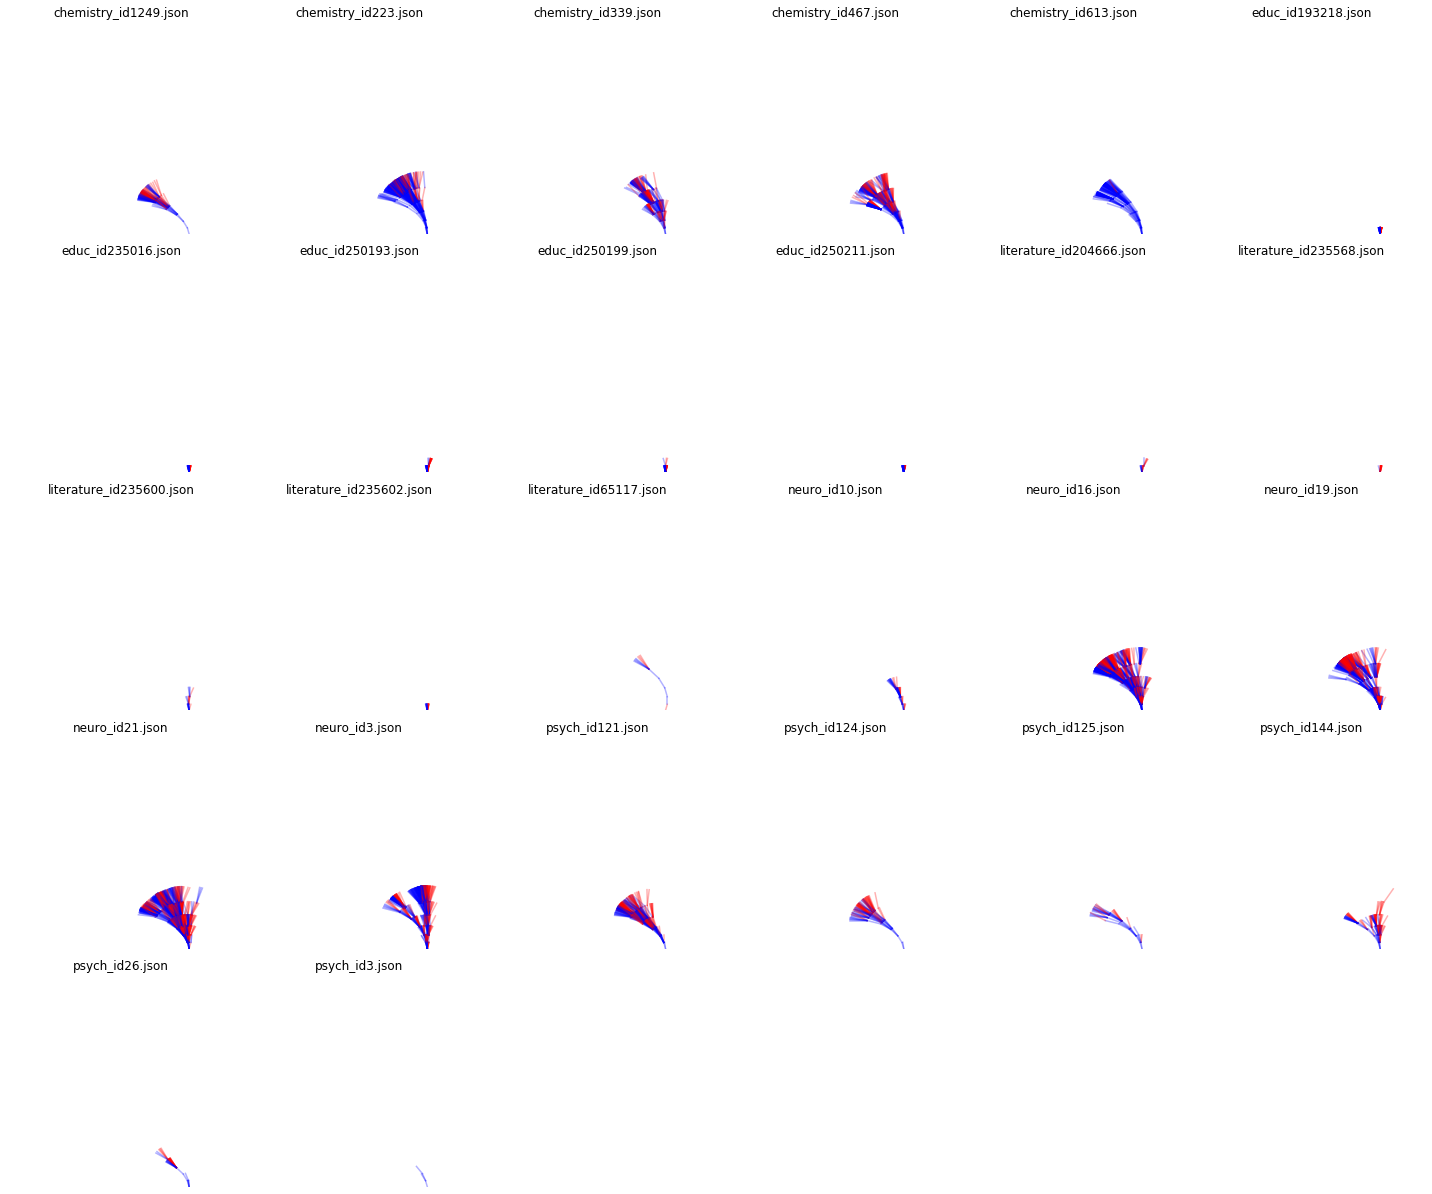

In [11]:
SCALE=1.2
CURL=15

fns = list(Path('data/').glob("*.json"))

plt.figure(figsize=(20,20))

for i, treefn in enumerate(fns):
    with open(treefn) as f:
        tree = json.loads(f.read())
        for s, e, c in unfurl(tree, depth=None):
            ax = plt.subplot(6,6,i+1)
            ax.set_xlim(left=-32, right=8)
            ax.set_ylim(bottom=0, top=40)
            ax.plot(
                [s[0],e[0]],
                [s[1],e[1]],
                color=c,
                alpha=0.3
            )
        plt.axis('off')
        plt.title(treefn.name)
plt.savefig('test_data.svg')

In [ ]:
SCALE=1.2
CURL=15

fns = list(Path('all_psych_data/').glob("*.json"))

plt.figure(figsize=(200,200))

for i, treefn in enumerate(fns):
    with open(treefn) as f:
        tree = json.loads(f.read())
        ax = plt.subplot(57,57,i+1)
        for s, e, c in unfurl(tree, depth=None):
            ax.set_title(treefn.name)
            ax.set_xlim(left=-32, right=8)
            ax.set_ylim(bottom=0, top=40)
            ax.plot(
                [s[0],e[0]],
                [s[1],e[1]],
                color=c,
                alpha=0.3
            )
#         plt.axis('off')
plt.savefig('all_psych_data.svg')

In [262]:
# %matplotlib notebook

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d

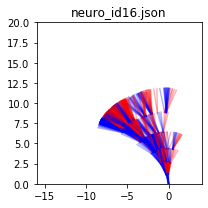

In [117]:
SCALE=1.2
CURL=15

fns = list(Path('data/test/').glob("*.json"))

plt.figure(figsize=(3,3))

for i, treefn in enumerate(fns):
    if treefn.name == "neuro_id16.json":
        with open(treefn) as f:
            tree = json.loads(f.read())
            for s, e, c in unfurl(tree, depth=None):
                ax = plt.subplot()
                ax.set_xlim(left=-16, right=4)
                ax.set_ylim(bottom=0, top=20)
#                 ax.set_facecolor("grey")
                ax.plot(
                    [s[0],e[0]],
                    [s[1],e[1]],
                    color=c,
                    alpha=0.3
                )
#                 ax.axis('off')
            plt.title(treefn.name)
# plt.savefig('Fan.svg')

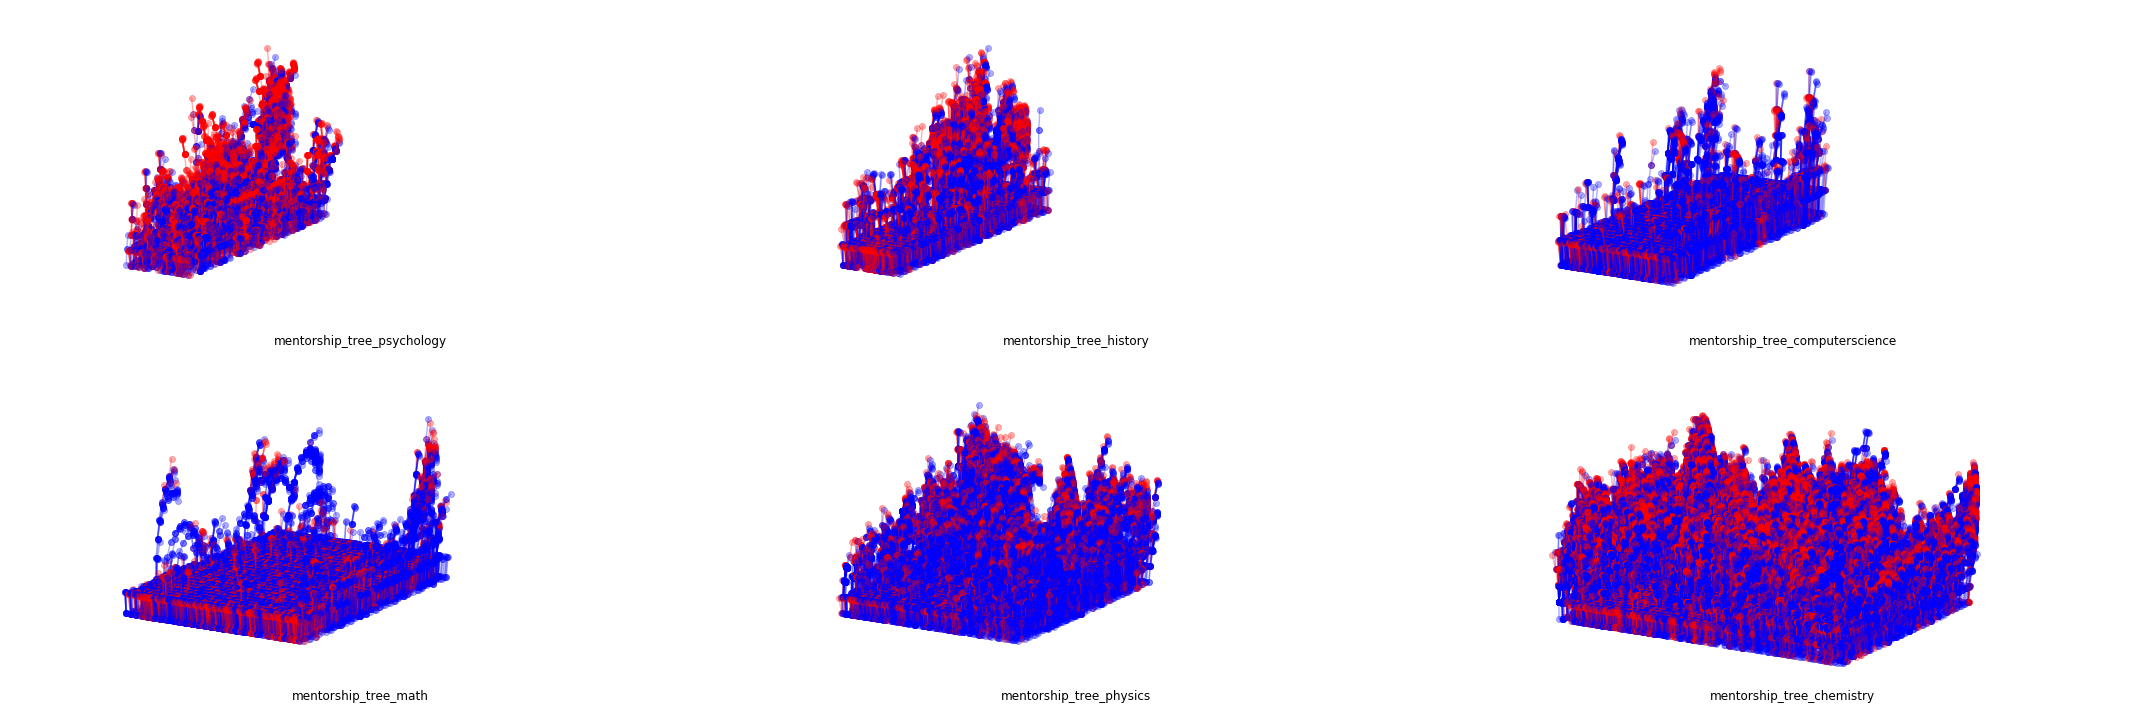

In [125]:
SCALE=1
CURL=15.5

fig = plt.figure(figsize=(30,10))

psych = list(Path('data/psych/').glob("*.json"))
ax = fig.add_subplot(2,3,1,projection='3d')

n = 0
m = 0

for i, treefn in enumerate(psych):
    n = n + 1
    with open(treefn) as f:
        tree = json.loads(f.read())
        if n == 31 :
            m = m + 2
            n = 0
        else:
            for s, e, c in unfurl(tree, depth=None):
                ax.plot3D([s[0]+n, e[0]+n], [s[0]+0.1*(n)+m, e[0]+0.1*(n)+m], [s[1],e[1]], "o-",color=c, alpha=0.3)
            plt.title("mentorship_tree_psychology")
            ax.axis('off')
            ax.set_ylim(bottom=0, top=1000)
            ax.view_init(30,30)
        
hist = list(Path('data/hist/').glob("*.json"))
ax = fig.add_subplot(2,3,2,projection='3d')

n = 0
m = 0

for i, treefn in enumerate(hist):
    n = n + 1
    with open(treefn) as f:
        tree = json.loads(f.read())
        if n == 31 :
            m = m + 2
            n = 0
        else:
            for s, e, c in unfurl(tree, depth=None):
                ax.plot3D([s[0]+n, e[0]+n], [s[0]+0.1*(n)+m, e[0]+0.1*(n)+m], [s[1],e[1]], "o-",color=c, alpha=0.3)
            plt.title("mentorship_tree_history")
            ax.axis('off')
            ax.set_ylim(bottom=0, top=1000)
            ax.view_init(30,30)
            

computerscience = list(Path('data/computerscience/').glob("*.json"))
ax = fig.add_subplot(2,3,3,projection='3d')

n = 0
m = 0

for i, treefn in enumerate(computerscience):
    n = n + 1
    with open(treefn) as f:
        tree = json.loads(f.read())
        if n == 31 :
            m = m + 2
            n = 0
        else:
            for s, e, c in unfurl(tree, depth=None):
                ax.plot3D([s[0]+n, e[0]+n], [s[0]+0.1*(n)+m, e[0]+0.1*(n)+m], [s[1],e[1]], "o-",color=c, alpha=0.3)
            plt.title("mentorship_tree_computerscience")
            ax.axis('off')
            ax.set_ylim(bottom=0, top=1000)
            ax.view_init(30,30)

            
math = list(Path('data/math/').glob("*.json"))
ax = fig.add_subplot(2,3,4,projection='3d')

n = 0
m = 0

for i, treefn in enumerate(math):
    n = n + 1
    with open(treefn) as f:
        tree = json.loads(f.read())
        if n == 31 :
            m = m + 2
            n = 0
        else:
            for s, e, c in unfurl(tree, depth=None):
                ax.plot3D([s[0]+n, e[0]+n], [s[0]+0.1*(n)+m, e[0]+0.1*(n)+m], [s[1],e[1]], "o-",color=c, alpha=0.3)
            plt.title("mentorship_tree_math")
            ax.axis('off')
            ax.set_ylim(bottom=0, top=1000)
            ax.view_init(30,30)

            
physics = list(Path('data/physics/').glob("*.json"))
ax = fig.add_subplot(2,3,5,projection='3d')

n = 0
m = 0

for i, treefn in enumerate(physics):
    n = n + 1
    with open(treefn) as f:
        tree = json.loads(f.read())
        if n == 31 :
            m = m + 2
            n = 0
        else:
            for s, e, c in unfurl(tree, depth=None):
                ax.plot3D([s[0]+n, e[0]+n], [s[0]+0.1*(n)+m, e[0]+0.1*(n)+m], [s[1],e[1]], "o-",color=c, alpha=0.3)
            plt.title("mentorship_tree_physics")
            ax.axis('off')
            ax.set_ylim(bottom=0, top=1000)
            ax.view_init(30,30)
            

chemistry = list(Path('data/chemistry/').glob("*.json"))
ax = fig.add_subplot(2,3,6,projection='3d')

n = 0
m = 0

for i, treefn in enumerate(chemistry):
    n = n + 1
    with open(treefn) as f:
        tree = json.loads(f.read())
        if n == 31 :
            m = m + 2
            n = 0
        else:
            for s, e, c in unfurl(tree, depth=None):
                ax.plot3D([s[0]+n, e[0]+n], [s[0]+0.1*(n)+m, e[0]+0.1*(n)+m], [s[1],e[1]], "o-",color=c, alpha=0.3)
            plt.title("mentorship_tree_chemistry")
            ax.axis('off')
            ax.set_ylim(bottom=0, top=1000)
            ax.view_init(30,30)

plt.savefig('all.png')